In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# -------------------------------------------------The XOR Problem-------------------------------------------------
# Why XOR?
# XOR (exclusive or) is a simple logical operation:

# If inputs are different → output 1
# If inputs are the same → output 0
# Input A	Input B	Output
# 0	            0	0
# 0	            1	1
# 1	            0	1
# 1	            1	0
# The Historical Importance
# In 1969, Minsky and Papert proved that a single-layer perceptron (one neuron) cannot learn XOR. This caused the first "AI Winter" — people thought neural networks were fundamentally limited.

# The solution? Hidden layers. A network with at least one hidden layer CAN learn XOR. This notebook proves it.

In [4]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])
print(f"x--\n {X} \n estimated y--\n {y}")

x--
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] 
 estimated y--
 [[0]
 [1]
 [1]
 [0]]


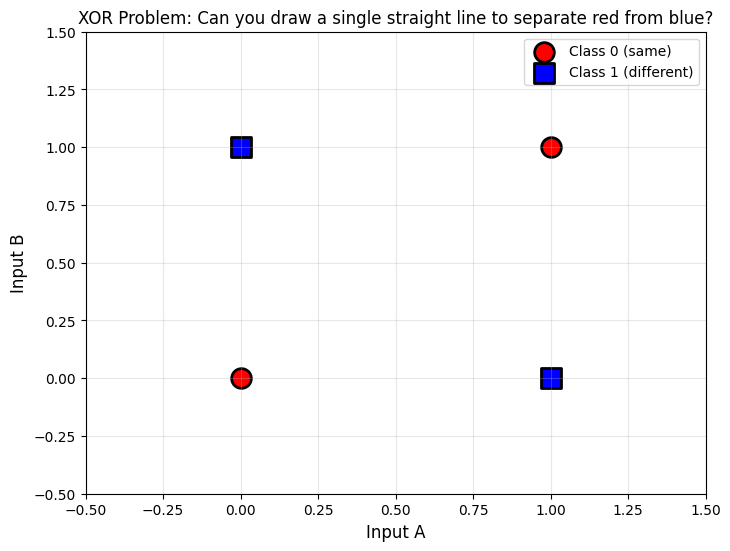


 A single straight line CANNOT separate these classes.
This is why we need hidden layers — they create non-linear boundaries.


In [5]:
plt.figure(figsize=(8, 6))

# Plot the points
for i in range(len(X)):
    color = 'red' if y[i][0] == 0 else 'blue'
    marker = 'o' if y[i][0] == 0 else 's'
    plt.scatter(X[i][0], X[i][1], c=color, s=200, marker=marker,
                edgecolors='black', linewidths=2)

plt.xlabel('Input A', fontsize=12)
plt.ylabel('Input B', fontsize=12)
plt.title('XOR Problem: Can you draw a single straight line to separate red from blue?',
          fontsize=12)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True, alpha=0.3)
plt.legend(['Class 0 (same)', 'Class 1 (different)'], loc='upper right')
plt.show()

print("\n A single straight line CANNOT separate these classes.")
print("This is why we need hidden layers — they create non-linear boundaries.")

In [6]:
# ---------------------------------------------Building the Neural Networt---------------------------------------

# Architecture ---> Input Layer (2 neurons) → Hidden Layer (4 neurons) → Output Layer (1 neuron)

# Input: 2 values (the two XOR inputs)
# Hidden: 4 neurons with sigmoid activation
# Output: 1 neuron with sigmoid activation (gives us 0-1 probability)



# Network architecture
INPUT_SIZE = 2    # Two inputs (A and B)
HIDDEN_SIZE = 4   # Four neurons in hidden layer
OUTPUT_SIZE = 1   # One output (0 or 1)




In [13]:
# Weights from input to hidden layer (2 inputs → 4 hidden neurons)
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5
bias_hidden = np.zeros((1, HIDDEN_SIZE)) #--->[0,0,0,0]

print(f"weights_input_hidden -- {weights_input_hidden}")
print(f"bias_hidden -- {bias_hidden}")

weights_input_hidden -- [[ 0.46853067 -0.43841381  0.43952454  0.57497007]
 [ 0.30846768  0.47139983  0.78164219  0.68337933]]
bias_hidden -- [[0. 0. 0. 0.]]


In [14]:
# Weights from hidden to output layer (4 hidden neurons → 1 output)
weights_hidden_output = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

In [15]:
print("Network initialized with random weights:")
print(f"  Input → Hidden weights shape: {weights_input_hidden.shape}")
print(f"  Hidden → Output weights shape: {weights_hidden_output.shape}")
print(f"\nTotal parameters: {weights_input_hidden.size + bias_hidden.size + weights_hidden_output.size + bias_output.size}")

Network initialized with random weights:
  Input → Hidden weights shape: (2, 4)
  Hidden → Output weights shape: (4, 1)

Total parameters: 17


In [16]:
# The Activation Function: Sigmoid
# Sigmoid squashes any number into the range (0, 1):

# Large positive numbers → close to 1
# Large negative numbers → close to 0
# Zero → exactly 0.5
# We also need its derivative for backpropagation.


def sigmoid(x):
    """Squash values to range (0, 1)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid: σ(x) * (1 - σ(x))"""
    s = sigmoid(x)
    return s * (1 - s)

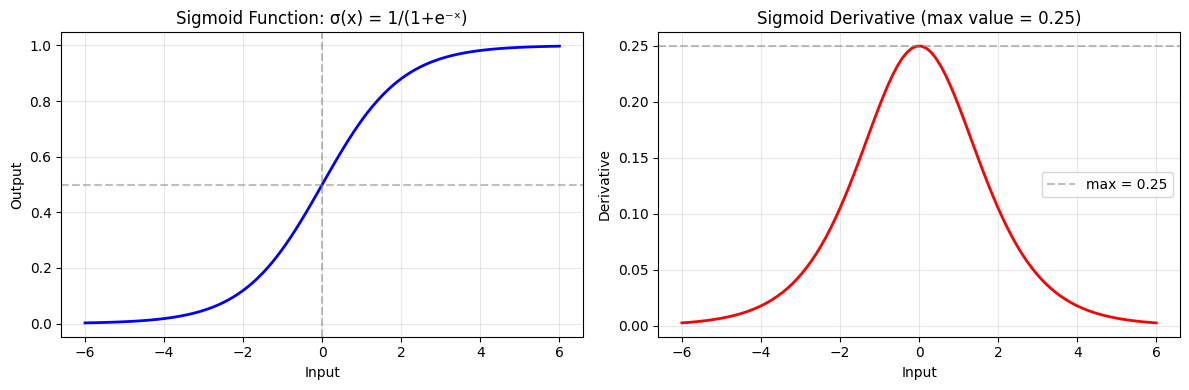

In [17]:
# Visualize sigmoid
x_range = np.linspace(-6, 6, 100)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_range, sigmoid(x_range), 'b-', linewidth=2)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Function: σ(x) = 1/(1+e⁻ˣ)')
plt.grid(True, alpha=0.3)


plt.subplot(1, 2, 2)
plt.plot(x_range, sigmoid_derivative(x_range), 'r-', linewidth=2)
plt.axhline(y=0.25, color='gray', linestyle='--', alpha=0.5, label='max = 0.25')
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.title('Sigmoid Derivative (max value = 0.25)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
print("\nNotice: The maximum derivative is only 0.25!")
print("   This is the vanishing gradient problem.")
print("   10 layers: 0.25^10 = ", 0.25**10)


Notice: The maximum derivative is only 0.25!
   This is the vanishing gradient problem.
   10 layers: 0.25^10 =  9.5367431640625e-07


In [20]:
# Forward Pass
# The forward pass is how data flows through the network:

# Input → Hidden: Multiply inputs by weights, add bias, apply activation
# Hidden → Output: Multiply hidden by weights, add bias, apply activation

def forward(X):
    """
    Forward pass through the network.
    Returns all intermediate values (we need them for backprop).
    """
    # Step 1: Input to Hidden
    # z_hidden = X @ W + b (linear combination)
    z_hidden = np.dot(X, weights_input_hidden) + bias_hidden

    # a_hidden = sigmoid(z_hidden) (activation)
    a_hidden = sigmoid(z_hidden)

    # Step 2: Hidden to Output
    # z_output = a_hidden @ W + b
    z_output = np.dot(a_hidden, weights_hidden_output) + bias_output

    # a_output = sigmoid(z_output)
    a_output = sigmoid(z_output)

    # Return everything (we need z values for backprop)
    return z_hidden, a_hidden, z_output, a_output

In [21]:
# Test forward pass with untrained network
z_h, a_h, z_o, predictions = forward(X)

In [22]:
print("Forward pass with UNTRAINED network:")
print("-" * 50)
for i in range(len(X)):
    print(f"Input: {X[i]} → Prediction: {predictions[i][0]:.4f} (Target: {y[i][0]})")

print("\n❌ Predictions are garbage — the network hasn't learned anything yet.")

Forward pass with UNTRAINED network:
--------------------------------------------------
Input: [0 0] → Prediction: 0.4812 (Target: 0)
Input: [0 1] → Prediction: 0.4768 (Target: 1)
Input: [1 0] → Prediction: 0.4914 (Target: 1)
Input: [1 1] → Prediction: 0.4865 (Target: 0)

❌ Predictions are garbage — the network hasn't learned anything yet.


In [23]:
# Loss Function: Mean Squared Error
# Loss measures how wrong our predictions are. Lower = better.

# MSE = mean((prediction - target)²)

# We square the error so:

# All errors are positive
# Big errors are penalized more than small errors


def compute_loss(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)


# Calculate initial loss
initial_loss = compute_loss(y, predictions)
print(f"Initial Loss (untrained): {initial_loss:.4f}")
print("\nThis number should decrease as we train.")

Initial Loss (untrained): 0.2501

This number should decrease as we train.


In [24]:
# Backpropagation
# This is where the magic happens. Backprop answers: "Which weights caused the error, and how much?"

# The Chain of Blame
# Calculate error at output
# Figure out how much each output weight contributed
# Propagate error back to hidden layer
# Figure out how much each hidden weight contributed
# Adjust all weights proportionally
# The math uses the chain rule from calculus, but the intuition is simple: blame flows backward.

In [25]:
def backward(X, y, z_hidden, a_hidden, z_output, a_output, learning_rate):
    """
    Backpropagation: compute gradients and update weights.
    """
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

    m = X.shape[0]  # Number of training examples

    # ============ OUTPUT LAYER ============
    # Error at output: difference between prediction and target
    output_error = a_output - y  # Shape: (4, 1)

    # Gradient of loss w.r.t. z_output (before activation)
    # This combines the error with the sigmoid derivative
    output_delta = output_error * sigmoid_derivative(z_output)  # Shape: (4, 1)

    # Gradient of loss w.r.t. weights_hidden_output
    # How much did each weight contribute to the error?
    grad_weights_hidden_output = np.dot(a_hidden.T, output_delta) / m
    grad_bias_output = np.mean(output_delta, axis=0, keepdims=True)

    # ============ HIDDEN LAYER ============
    # Propagate error back to hidden layer
    hidden_error = np.dot(output_delta, weights_hidden_output.T)

    # Gradient of loss w.r.t. z_hidden
    hidden_delta = hidden_error * sigmoid_derivative(z_hidden)

    # Gradient of loss w.r.t. weights_input_hidden
    grad_weights_input_hidden = np.dot(X.T, hidden_delta) / m
    grad_bias_hidden = np.mean(hidden_delta, axis=0, keepdims=True)

    # ============ UPDATE WEIGHTS ============
    # Move weights in the opposite direction of the gradient
    # (gradient points uphill, we want to go downhill)
    weights_hidden_output -= learning_rate * grad_weights_hidden_output
    bias_output -= learning_rate * grad_bias_output
    weights_input_hidden -= learning_rate * grad_weights_input_hidden
    bias_hidden -= learning_rate * grad_bias_hidden

print("Backpropagation function defined.")
print("This is the 'learning' part — adjusting weights to reduce error.")


Backpropagation function defined.
This is the 'learning' part — adjusting weights to reduce error.


In [26]:
# The Training Loop

# Now we put it all together:

# for each iteration:
#     1. Forward pass → get predictions
#     2. Calculate loss → how wrong are we?
#     3. Backward pass → compute gradients, update weights
# Let's train for 10,000 iterations and watch the loss decrease.

In [27]:
# Reset weights (in case you run this cell multiple times)
np.random.seed(42)
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5
bias_hidden = np.zeros((1, HIDDEN_SIZE))
weights_hidden_output = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

In [28]:
# Hyperparameters
learning_rate = 2.0  # How big our steps are
iterations = 10000   # How many times to loop

In [29]:
# Track loss over time
loss_history = []

In [30]:
print("Training started...")
print("-" * 50)

for i in range(iterations):
    # Forward pass
    z_h, a_h, z_o, predictions = forward(X)

    # Calculate loss
    loss = compute_loss(y, predictions)
    loss_history.append(loss)

    # Backward pass (updates weights internally)
    backward(X, y, z_h, a_h, z_o, predictions, learning_rate)

    # Print progress
    if i % 2000 == 0:
        print(f"Iteration {i:5d} | Loss: {loss:.6f}")

Training started...
--------------------------------------------------
Iteration     0 | Loss: 0.255675
Iteration  2000 | Loss: 0.005210
Iteration  4000 | Loss: 0.001005
Iteration  6000 | Loss: 0.000529
Iteration  8000 | Loss: 0.000355


In [31]:
# Final predictions
_, _, _, final_predictions = forward(X)

print("Final Results After Training:")
print("-" * 50)
print(f"{'Input':<12} {'Target':<10} {'Prediction':<12} {'Rounded':<10}")
print("-" * 50)

for i in range(len(X)):
    pred = final_predictions[i][0]
    rounded = round(pred)
    status = "✅" if rounded == y[i][0] else "❌"
    print(f"{str(X[i]):<12} {y[i][0]:<10} {pred:<12.4f} {rounded:<10} {status}")

print("-" * 50)
print(f"\n🎉 The network learned XOR from random weights!")

Final Results After Training:
--------------------------------------------------
Input        Target     Prediction   Rounded   
--------------------------------------------------
[0 0]        0          0.0187       0          ✅
[0 1]        1          0.9845       1          ✅
[1 0]        1          0.9844       1          ✅
[1 1]        0          0.0151       0          ✅
--------------------------------------------------

🎉 The network learned XOR from random weights!


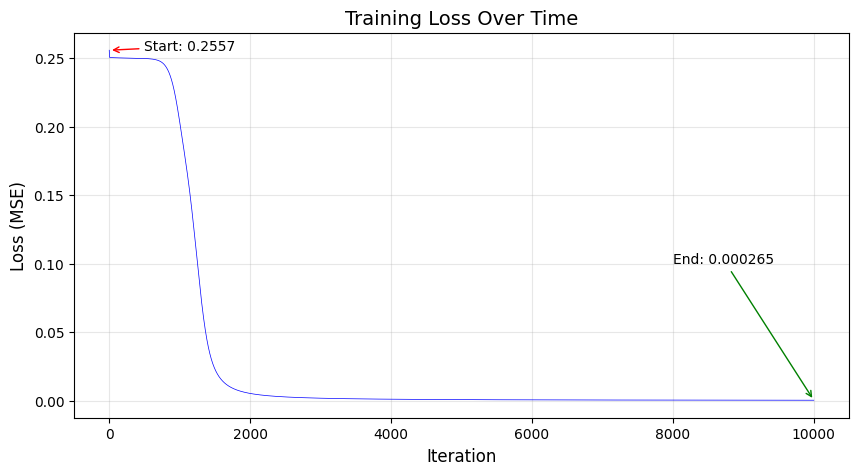

The loss started high (random guessing) and decreased (learning).


In [32]:
# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss_history, 'b-', linewidth=0.5)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training Loss Over Time', fontsize=14)
plt.grid(True, alpha=0.3)

# Add annotations
plt.annotate(f'Start: {loss_history[0]:.4f}',
             xy=(0, loss_history[0]), fontsize=10,
             xytext=(500, loss_history[0]),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate(f'End: {loss_history[-1]:.6f}',
             xy=(len(loss_history)-1, loss_history[-1]), fontsize=10,
             xytext=(len(loss_history)-2000, 0.1),
             arrowprops=dict(arrowstyle='->', color='green'))

plt.show()

print("The loss started high (random guessing) and decreased (learning).")

In [33]:
# -----------------------------------The PyTorch Version-----------------------------------

In [37]:
# Now let's see the same thing in PyTorch. Notice:

# loss.backward() does all the backprop math automatically
# optimizer.step() updates the weights automatically
# The concepts are identical. The code is cleaner.

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Define the network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)   # 2 inputs → 4 hidden
        self.output = nn.Linear(4, 1)   # 4 hidden → 1 output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Create network
torch.manual_seed(42)
model = XORNet()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=2.0)

# Training loop
pytorch_loss_history = []

print("Training PyTorch model...")
print("-" * 50)

for i in range(10000):
    # Forward pass
    predictions = model(X_tensor)
    loss = criterion(predictions, y_tensor)
    pytorch_loss_history.append(loss.item())

    # Backward pass (automatic!)
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients (THIS IS BACKPROP!)
    optimizer.step()       # Update weights

    if i % 2000 == 0:
        print(f"Iteration {i:5d} | Loss: {loss.item():.6f}")

print("-" * 50)
print(f"Iteration {10000:5d} | Loss: {pytorch_loss_history[-1]:.6f}")

Training PyTorch model...
--------------------------------------------------
Iteration     0 | Loss: 0.286560
Iteration  2000 | Loss: 0.000779
Iteration  4000 | Loss: 0.000298
Iteration  6000 | Loss: 0.000179
Iteration  8000 | Loss: 0.000127
--------------------------------------------------
Iteration 10000 | Loss: 0.000098


In [40]:
# Compare results
print("\nPyTorch Final Predictions:")
print("-" * 50)
with torch.no_grad():
    final_preds = model(X_tensor)
    for i in range(len(X)):
        pred = final_preds[i].item()
        print(f"Input: {X[i]} → Prediction: {pred:.4f} (Target: {y[i][0]})")


PyTorch Final Predictions:
--------------------------------------------------
Input: [0 0] → Prediction: 0.0091 (Target: 0)
Input: [0 1] → Prediction: 0.9890 (Target: 1)
Input: [1 0] → Prediction: 0.9913 (Target: 1)
Input: [1 1] → Prediction: 0.0105 (Target: 0)


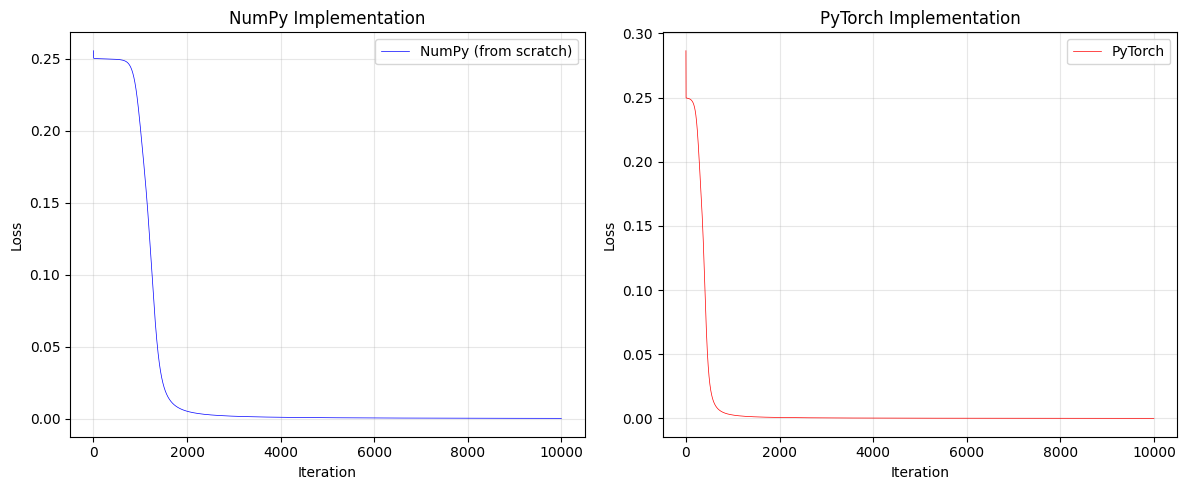


✅ Both implementations achieve the same result!
   PyTorch just automates the gradient calculations.


In [41]:
# Compare loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history, 'b-', linewidth=0.5, label='NumPy (from scratch)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('NumPy Implementation')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pytorch_loss_history, 'r-', linewidth=0.5, label='PyTorch')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PyTorch Implementation')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\n✅ Both implementations achieve the same result!")
print("   PyTorch just automates the gradient calculations.")